In [139]:
import pandas as pd  
import numpy as np

In [140]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [141]:
df = df[df["Functioning Day"] == "Yes"]

In [142]:
# Filter out the data with non zero rainfall
df = df[df['Rainfall(mm)'] != 0]

print("number of rows with non zero rainfall: ", df.shape[0])

number of rows with non zero rainfall:  516


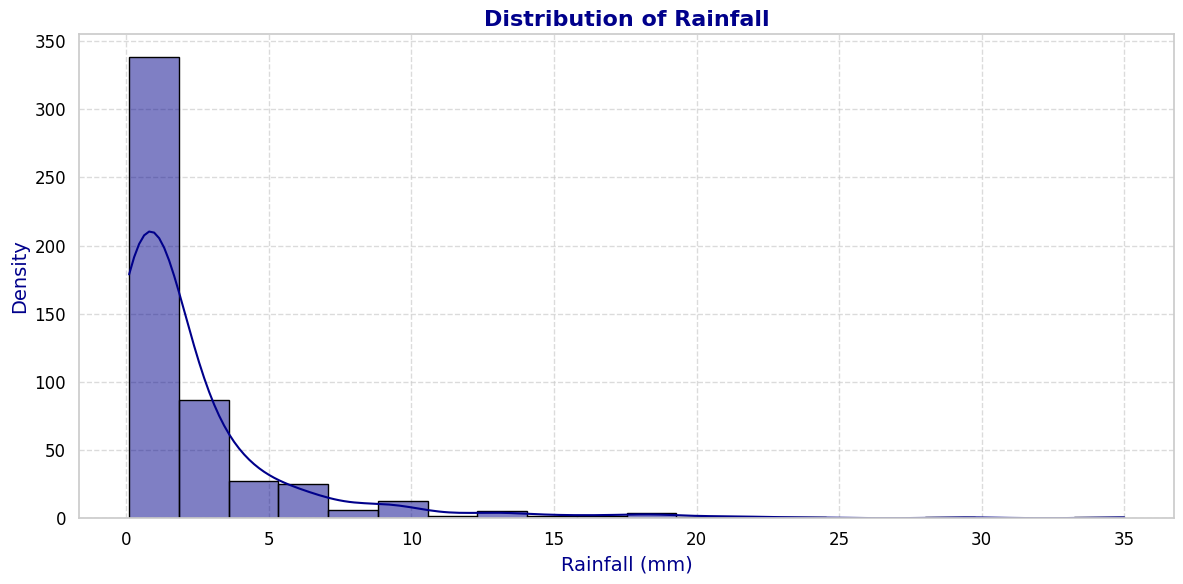

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Rainfall(mm)'], bins=20, color='darkblue', edgecolor='black', kde=True, linewidth=1)

# Title and labels
plt.title('Distribution of Rainfall', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Rainfall (mm)', fontsize=14, color='darkblue')
plt.ylabel('Density', fontsize=14, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_359821/1555155085.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rainfall(mm)', data=df, palette='Set2', linewidth=2)


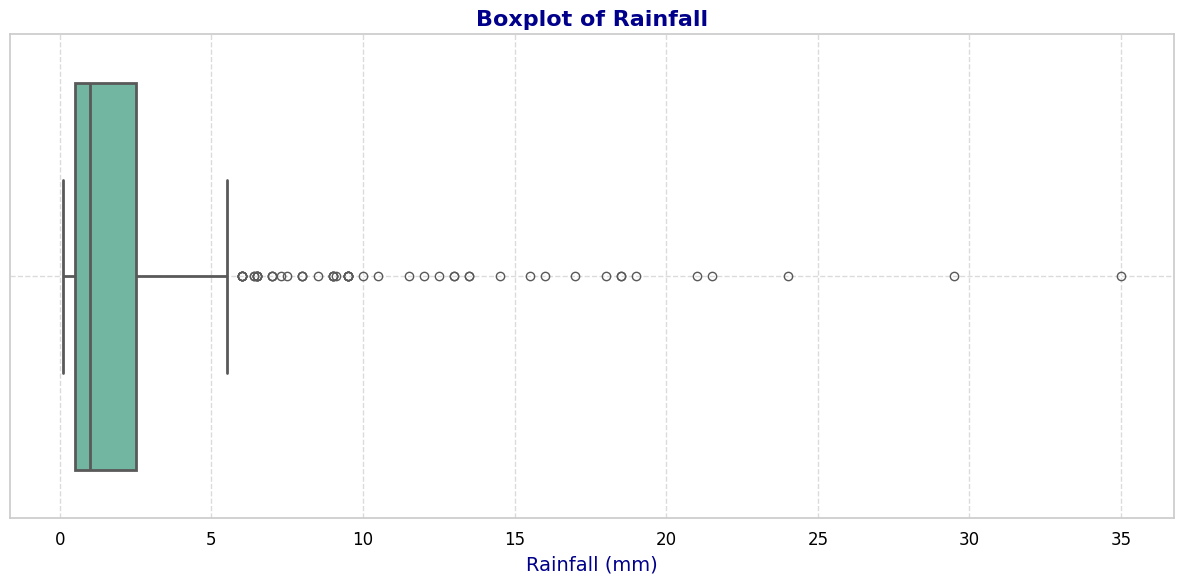

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rainfall(mm)', data=df, palette='Set2', linewidth=2)

# Title and labels
plt.title('Boxplot of Rainfall', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Rainfall (mm)', fontsize=14, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


In [145]:
# describe the rainfall column
print(df['Rainfall(mm)'].describe())



count    516.000000
mean       2.446318
std        3.897418
min        0.100000
25%        0.500000
50%        1.000000
75%        2.500000
max       35.000000
Name: Rainfall(mm), dtype: float64


In [162]:
# Separate based on Quartiles

dfQuartile1 = df[df['Rainfall(mm)'] < 0.5]
dfQuartile2 = df[(df['Rainfall(mm)'] >= 0.5) & (df['Rainfall(mm)'] < 1.00)]
dfQuartile3 = df[(df['Rainfall(mm)'] >= 1.00) & (df['Rainfall(mm)'] < 2.50)]
dfQuartile4 = df[df['Rainfall(mm)'] >= 2.50]

In [163]:
print("Number of rows in Quartile 1: ", dfQuartile1.shape[0])
print("Number of rows in Quartile 2: ", dfQuartile2.shape[0])
print("Number of rows in Quartile 3: ", dfQuartile3.shape[0])
print("Number of rows in Quartile 4: ", dfQuartile4.shape[0])

Number of rows in Quartile 1:  89
Number of rows in Quartile 2:  121
Number of rows in Quartile 3:  160
Number of rows in Quartile 4:  146


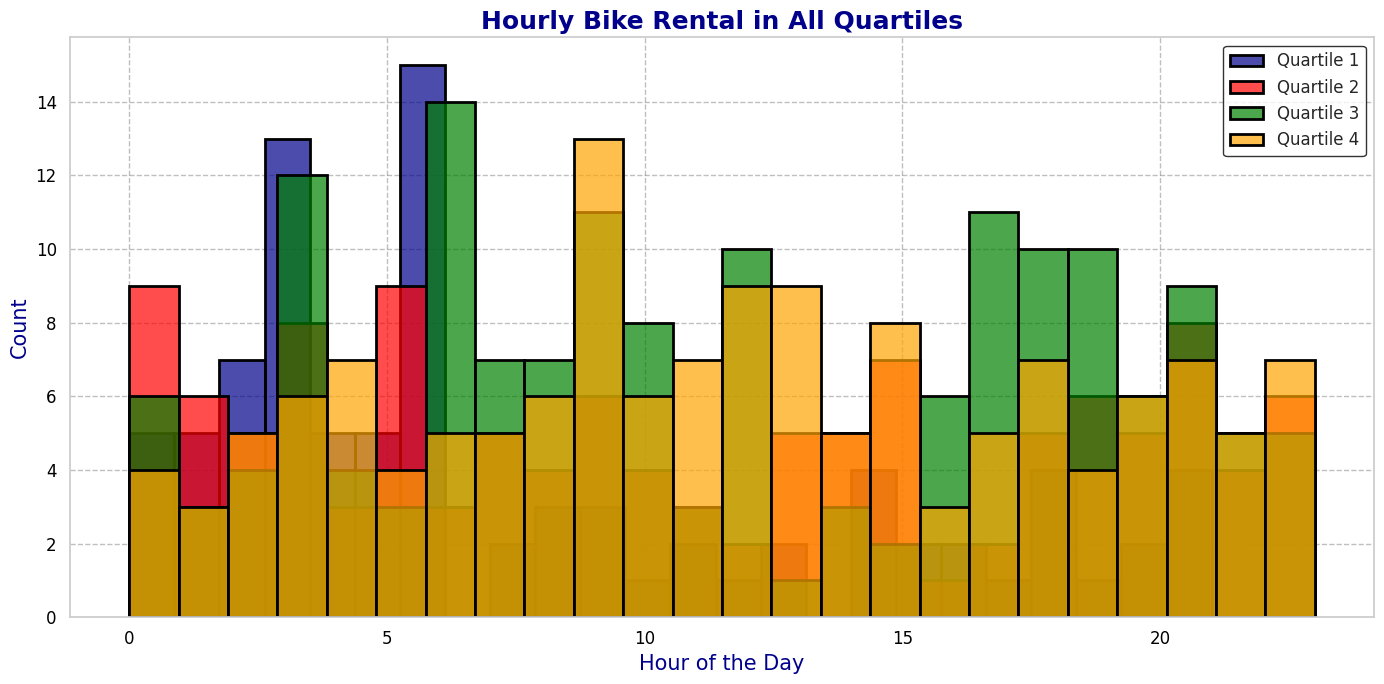

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 7))

# Quartile 1
sns.histplot(dfQuartile1['Hour'], bins=24, color='darkblue', edgecolor='black', kde=False, linewidth=2, label='Quartile 1', alpha=0.7)

# Quartile 2
sns.histplot(dfQuartile2['Hour'], bins=24, color='red', edgecolor='black', kde=False, linewidth=2, label='Quartile 2', alpha=0.7)

# Quartile 3
sns.histplot(dfQuartile3['Hour'], bins=24, color='green', edgecolor='black', kde=False, linewidth=2, label='Quartile 3', alpha=0.7)

# Quartile 4
sns.histplot(dfQuartile4['Hour'], bins=24, color='orange', edgecolor='black', kde=False, linewidth=2, label='Quartile 4', alpha=0.7)

# Title and labels
plt.title('Hourly Bike Rental in All Quartiles', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Hour of the Day', fontsize=15, color='darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add legend
plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


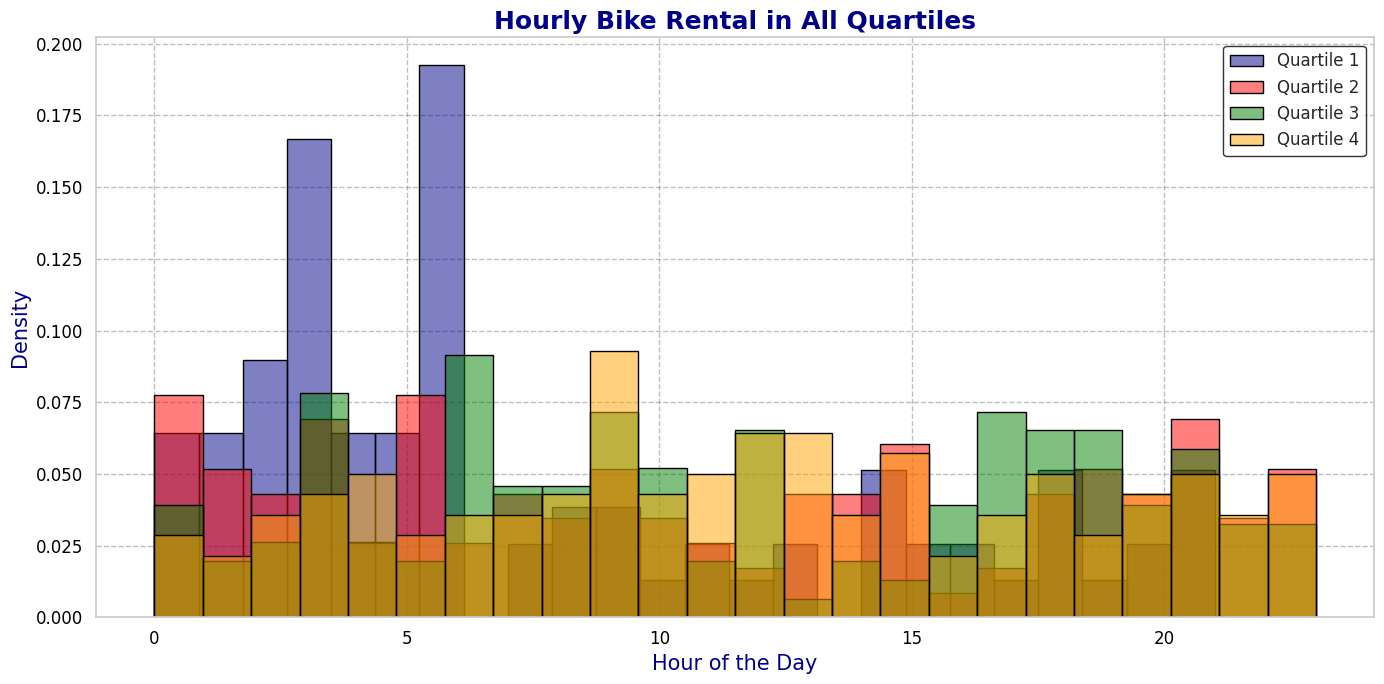

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 7))

# Plot histograms for each quartile
sns.histplot(dfQuartile1['Hour'], bins=24, color='darkblue', edgecolor='black', kde=False, label='Quartile 1', alpha=0.5, stat='density')
sns.histplot(dfQuartile2['Hour'], bins=24, color='red', edgecolor='black', kde=False, label='Quartile 2', alpha=0.5, stat='density')
sns.histplot(dfQuartile3['Hour'], bins=24, color='green', edgecolor='black', kde=False, label='Quartile 3', alpha=0.5, stat='density')
sns.histplot(dfQuartile4['Hour'], bins=24, color='orange', edgecolor='black', kde=False, label='Quartile 4', alpha=0.5, stat='density')

# Title and labels
plt.title('Hourly Bike Rental in All Quartiles', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Hour of the Day', fontsize=15, color='darkblue')
plt.ylabel('Density', fontsize=15, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add legend
plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_359821/186536768.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hour', y='Quartile', data=df_combined, palette='coolwarm', scale='width', inner='quartile')
/tmp/ipykernel_359821/186536768.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Hour', y='Quartile', data=df_combined, palette='coolwarm', scale='width', inner='quartile')


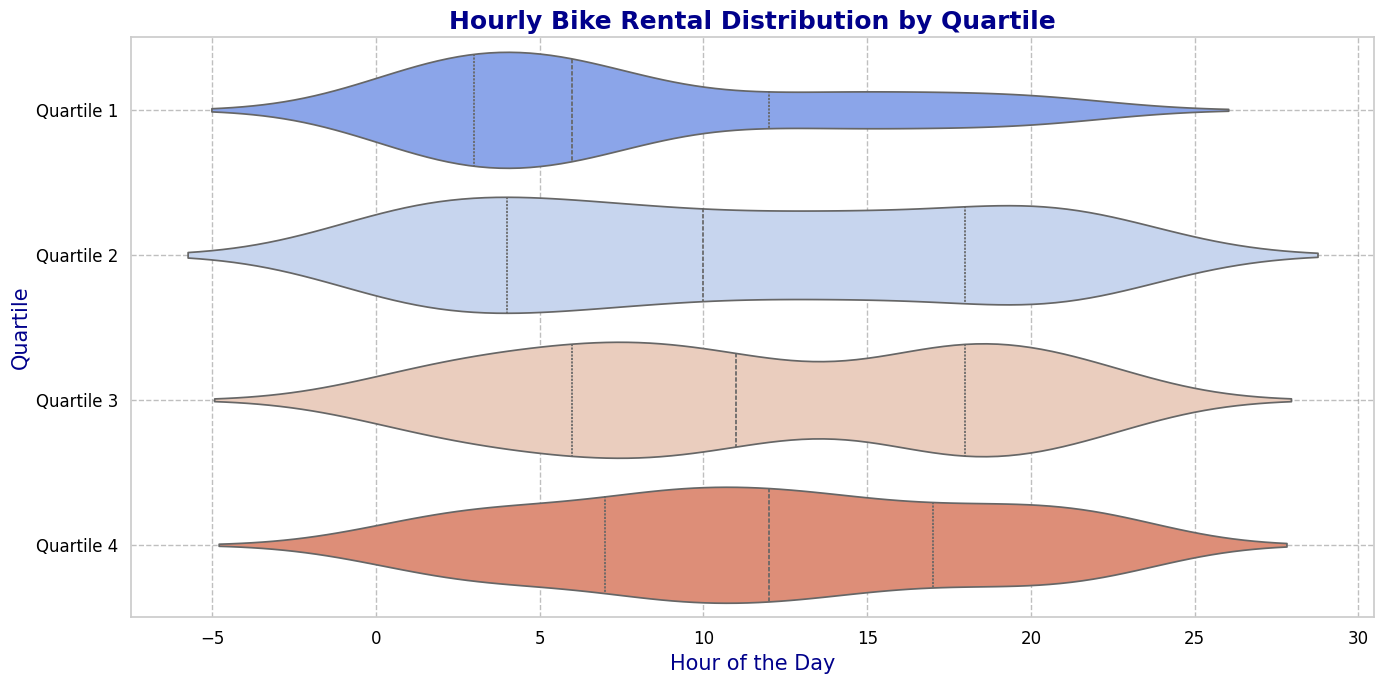

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine quartiles into a single DataFrame for violin plotting
df_combined = pd.concat([
    dfQuartile1.assign(Quartile='Quartile 1'),
    dfQuartile2.assign(Quartile='Quartile 2'),
    dfQuartile3.assign(Quartile='Quartile 3'),
    dfQuartile4.assign(Quartile='Quartile 4')
])

# Plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='Hour', y='Quartile', data=df_combined, palette='coolwarm', scale='width', inner='quartile')

# Title and labels
plt.title('Hourly Bike Rental Distribution by Quartile', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Hour of the Day', fontsize=15, color='darkblue')
plt.ylabel('Quartile', fontsize=15, color='darkblue')

# Customize tick parameters
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add gridlines
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

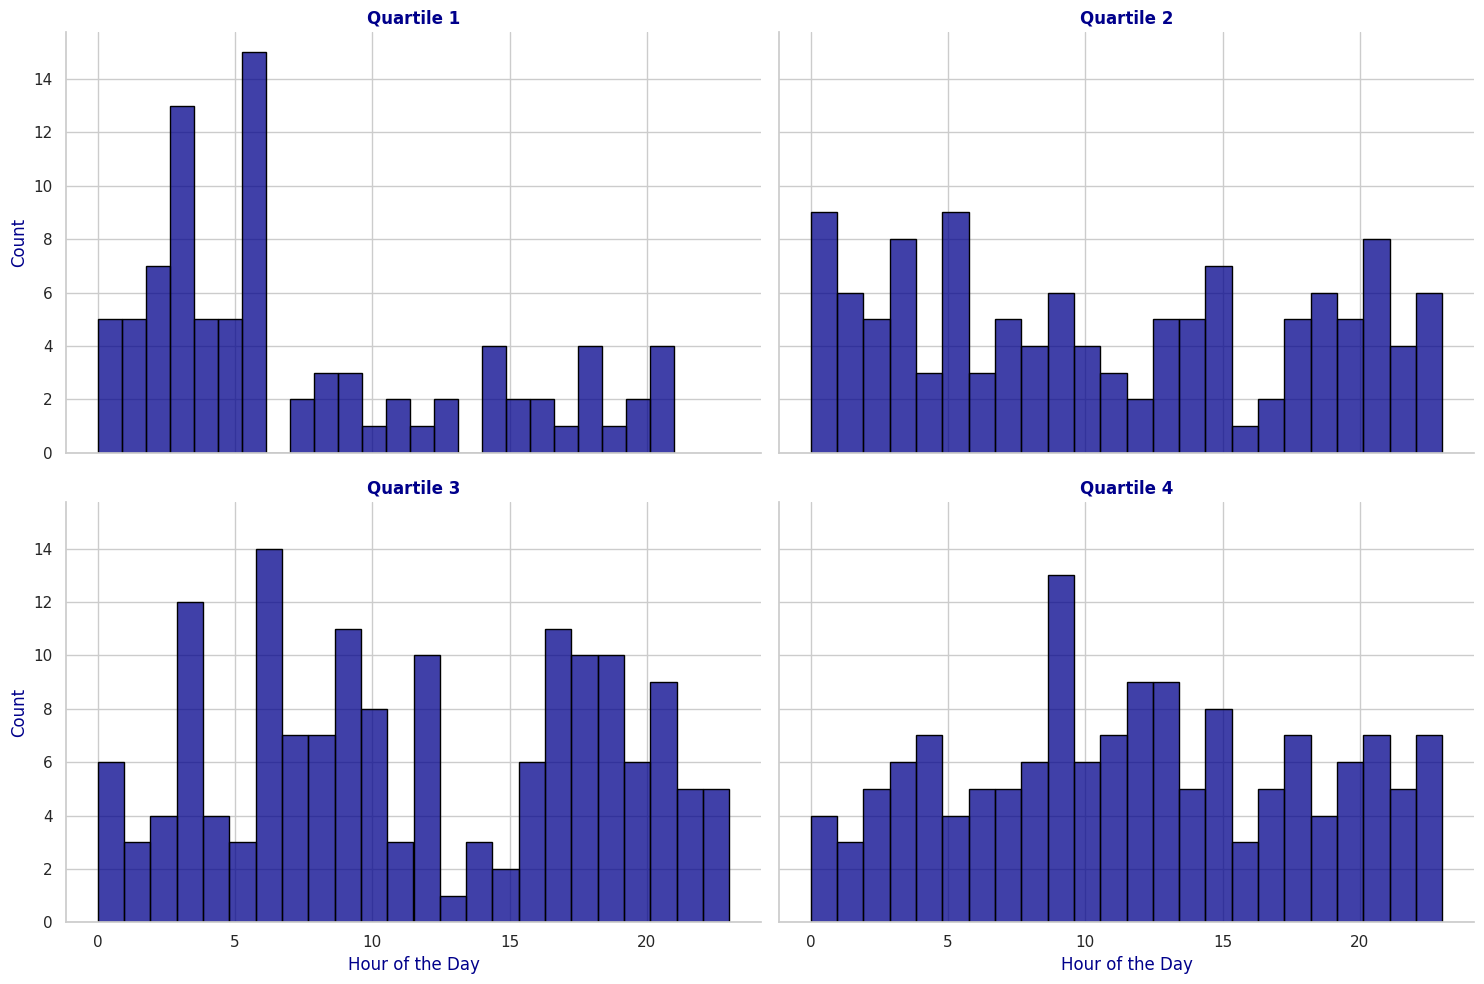

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine quartiles into a single DataFrame for facet plotting
df_combined = pd.concat([
    dfQuartile1.assign(Quartile='Quartile 1'),
    dfQuartile2.assign(Quartile='Quartile 2'),
    dfQuartile3.assign(Quartile='Quartile 3'),
    dfQuartile4.assign(Quartile='Quartile 4')
])

# Plot
plt.figure(figsize=(14, 7))
g = sns.FacetGrid(df_combined, col='Quartile', col_wrap=2, height=5, aspect=1.5)
g.map(sns.histplot, 'Hour', bins=24, color='darkblue', edgecolor='black', kde=False)

# Titles and labels
g.set_titles(col_template="{col_name}", fontsize=14, fontweight='bold', color='darkblue')
g.set_axis_labels('Hour of the Day', 'Count', fontsize=12, color='darkblue')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [168]:
mean1 = dfQuartile1['Rented Bike Count'].mean()
mean2 = dfQuartile2['Rented Bike Count'].mean()
mean3 = dfQuartile3['Rented Bike Count'].mean()
mean4 = dfQuartile4['Rented Bike Count'].mean()

print("Mean of Rented Bike Count in Quartile 1: ", mean1)
print("Mean of Rented Bike Count in Quartile 2: ", mean2)
print("Mean of Rented Bike Count in Quartile 3: ", mean3)
print("Mean of Rented Bike Count in Quartile 4: ", mean4)

Mean of Rented Bike Count in Quartile 1:  252.0561797752809
Mean of Rented Bike Count in Quartile 2:  252.27272727272728
Mean of Rented Bike Count in Quartile 3:  127.1875
Mean of Rented Bike Count in Quartile 4:  89.02054794520548


In [169]:
SSW = 0
SSW += sum((dfQuartile1['Rented Bike Count'] - mean1) ** 2)
SSW += sum((dfQuartile2['Rented Bike Count'] - mean2) ** 2)
SSW += sum((dfQuartile3['Rented Bike Count'] - mean3) ** 2)
SSW += sum((dfQuartile4['Rented Bike Count'] - mean4) ** 2)

print("SSW: ", SSW)


SSW:  33201816.03245729


In [170]:
SSB = 0

SSB += len(dfQuartile1) * (mean1 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile2) * (mean2 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile3) * (mean3 - df['Rented Bike Count'].mean()) ** 2
SSB += len(dfQuartile4) * (mean4 - df['Rented Bike Count'].mean()) ** 2

print("SSB: ", SSB)


SSB:  2665086.6865349603


In [173]:
F = (SSB / 3) / (SSW / (len(dfQuartile1) + len(dfQuartile2) + len(dfQuartile3) + len(dfQuartile4) - 4))

print("F: ", F)

F:  13.6992946627977


In [174]:
# Import the f-distribution
from scipy.stats import f

# Define the number of groups and the degrees of freedom
num_groups = 4
dfn = num_groups - 1
dfd = len(dfQuartile1) + len(dfQuartile2) + len(dfQuartile3) + len(dfQuartile4) - num_groups

# Calculate the critical value
critical_value = f.ppf(0.95, dfn, dfd)

print("Critical Value: ", critical_value)

Critical Value:  2.6223153068438396


In [175]:
# Compare the F-value with the critical value
if F > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

Reject the null hypothesis: There is a significant difference between the group means.


In [176]:
# Calculate the p-value
p_value = 1 - f.cdf(F, dfn, dfd)

print("P-Value: ", p_value)

P-Value:  1.3142755661554872e-08


In [177]:


# Verify the results using the ANOVA test
from scipy.stats import f_oneway

# Perform the ANOVA test
f_statistic, p_value = f_oneway(dfQuartile1['Rented Bike Count'], dfQuartile2['Rented Bike Count'], dfQuartile3['Rented Bike Count'], dfQuartile4['Rented Bike Count'])

print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  13.699294662797698
P-Value:  1.3142755691851183e-08
